In [2]:
import os
import cv2
import math
import numpy as np
import pandas as pd
from PIL import Image
import tensorflow as tf
import matplotlib.pyplot as plt

In [6]:
model = tf.keras.models.load_model('/content/drive/MyDrive/PyLearn 7 Course/55.CNN_Regression/Age_Recognition_Model.h5')

1/1 [==============================] - 0s 36ms/step
[[27.752272]]


<ipython-input-19-1f54b8e831b7>:126: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title(f'Predicted Age : {int(output)}')


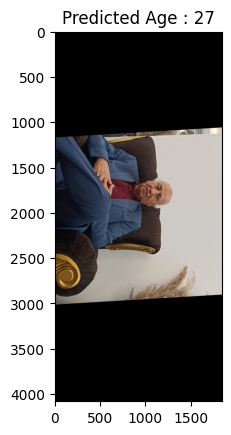

In [19]:
def face_detection(img):
	faces = face_detector.detectMultiScale(img, 1.1, 4)
	if (len(faces) <= 0):
		img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
		return img, img_gray
	else:
		X, Y, W, H = faces[0]
		img = img[int(Y):int(Y+H), int(X):int(X+W)]
		return img, cv2.cvtColor(img, cv2.COLOR_BGR2BGRA)


def trignometry_for_distance(a, b):
	return math.sqrt(((b[0] - a[0]) * (b[0] - a[0])) +\
					((b[1] - a[1]) * (b[1] - a[1])))

# Find eyes
def Face_Alignment(img_path):
	# pl.imshow(cv2.imread(img_path)[:, :, ::-1])
	# pl.show()
	img_raw = cv2.imread(img_path).copy()
	img, gray_img = face_detection(cv2.imread(img_path))
	eyes = eye_detector.detectMultiScale(gray_img)

	# for multiple people in an image find the largest
	# pair of eyes
	if len(eyes) >= 2:
		eye = eyes[:, 2]
		container1 = []
		for i in range(0, len(eye)):
			container = (eye[i], i)
			container1.append(container)
		df = pd.DataFrame(container1, columns=[
						"length", "idx"]).sort_values(by=['length'])
		eyes = eyes[df.idx.values[0:2]]

		# deciding to choose left and right eye
		eye_1 = eyes[0]
		eye_2 = eyes[1]
		if eye_1[0] > eye_2[0]:
			left_eye = eye_2
			right_eye = eye_1
		else:
			left_eye = eye_1
			right_eye = eye_2

		# center of eyes
		# center of right eye
		right_eye_center = (
			int(right_eye[0] + (right_eye[2]/2)),
		int(right_eye[1] + (right_eye[3]/2)))
		right_eye_x = right_eye_center[0]
		right_eye_y = right_eye_center[1]
		cv2.circle(img, right_eye_center, 2, (255, 0, 0), 3)

		# center of left eye
		left_eye_center = (
			int(left_eye[0] + (left_eye[2] / 2)),
		int(left_eye[1] + (left_eye[3] / 2)))
		left_eye_x = left_eye_center[0]
		left_eye_y = left_eye_center[1]
		cv2.circle(img, left_eye_center, 2, (255, 0, 0), 3)

		# finding rotation direction
		if left_eye_y > right_eye_y:
			point_3rd = (right_eye_x, left_eye_y)
			direction = -1 # rotate image direction to clock
		else:
			point_3rd = (left_eye_x, right_eye_y)
			direction = 1 # rotate inverse direction of clock

		cv2.circle(img, point_3rd, 2, (255, 0, 0), 2)
		a = trignometry_for_distance(left_eye_center,
									point_3rd)
		b = trignometry_for_distance(right_eye_center,
									point_3rd)
		c = trignometry_for_distance(right_eye_center,
									left_eye_center)
		cos_a = (b*b + c*c - a*a)/(2*b*c)
		angle = (np.arccos(cos_a) * 180) / math.pi

		if direction == -1:
			angle = 90 - angle
		else:
			angle = -(90-angle)

		# rotate image
		new_img = Image.fromarray(img_raw)
		new_img = np.array(new_img.rotate(direction * angle))

	return new_img

# def inference(path):
opencv_home = cv2.__file__
folders = opencv_home.split(os.path.sep)[0:-1]
path = folders[0]
for folder in folders[1:]:
  path = path + "/" + folder
path_for_face = path+"/data/haarcascade_frontalface_default.xml"
path_for_eyes = path+"/data/haarcascade_eye.xml"
path_for_nose = path+"/data/haarcascade_mcs_nose.xml"

if os.path.isfile(path_for_face) != True:
  raise ValueError(
    "opencv is not installed pls install using pip install opencv ",
  detector_path, " violated.")

face_detector = cv2.CascadeClassifier(path_for_face)
eye_detector = cv2.CascadeClassifier(path_for_eyes)
nose_detector = cv2.CascadeClassifier(path_for_nose)

width = height = 120
test_set = ['Grandpa.jpg']
for i in test_set:
  alignedFace = Face_Alignment(i)
  img, gray_img = face_detection(alignedFace)

  input = img[:, :, ::-1]
  input = cv2.resize(input , (width,height))
  input = input / 255.0
  input = np.reshape(input, [1, width, height, 3])

  output = model.predict(input)
  print(output)

  plt.imshow(img[:, :, ::-1])
  plt.title(f'Predicted Age : {int(output)}')
  plt.show()

In [ ]:
inference()

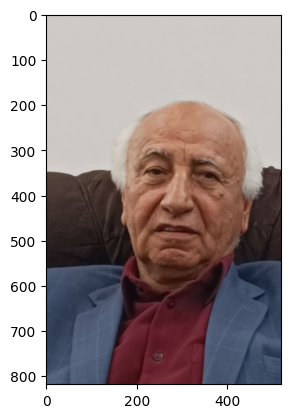

Rotate image to clock direction


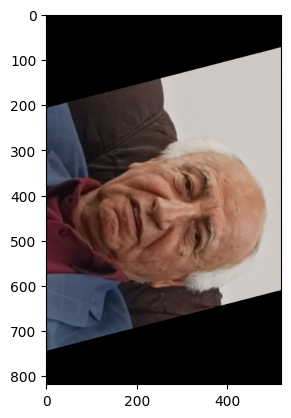

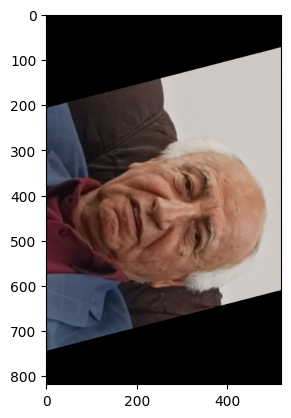

In [21]:
# install and import above modules first
import os
import cv2
import math
import matplotlib.pyplot as pl
import pandas as pd
from PIL import Image
import numpy as np

# Detect face
def face_detection(img):
	faces = face_detector.detectMultiScale(img, 1.1, 4)
	if (len(faces) <= 0):
		img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
		return img, img_gray
	else:
		X, Y, W, H = faces[0]
		img = img[int(Y):int(Y+H), int(X):int(X+W)]
		return img, cv2.cvtColor(img, cv2.COLOR_BGR2BGRA)


def trignometry_for_distance(a, b):
	return math.sqrt(((b[0] - a[0]) * (b[0] - a[0])) +\
					((b[1] - a[1]) * (b[1] - a[1])))

# Find eyes
def Face_Alignment(img_path):
	pl.imshow(cv2.imread(img_path)[:, :, ::-1])
	pl.show()
	img_raw = cv2.imread(img_path).copy()
	img, gray_img = face_detection(cv2.imread(img_path))
	eyes = eye_detector.detectMultiScale(gray_img)

	# for multiple people in an image find the largest
	# pair of eyes
	if len(eyes) >= 2:
		eye = eyes[:, 2]
		container1 = []
		for i in range(0, len(eye)):
			container = (eye[i], i)
			container1.append(container)
		df = pd.DataFrame(container1, columns=[
						"length", "idx"]).sort_values(by=['length'])
		eyes = eyes[df.idx.values[0:2]]

		# deciding to choose left and right eye
		eye_1 = eyes[0]
		eye_2 = eyes[1]
		if eye_1[0] > eye_2[0]:
			left_eye = eye_2
			right_eye = eye_1
		else:
			left_eye = eye_1
			right_eye = eye_2

		# center of eyes
		# center of right eye
		right_eye_center = (
			int(right_eye[0] + (right_eye[2]/2)),
		int(right_eye[1] + (right_eye[3]/2)))
		right_eye_x = right_eye_center[0]
		right_eye_y = right_eye_center[1]
		cv2.circle(img, right_eye_center, 2, (255, 0, 0), 3)

		# center of left eye
		left_eye_center = (
			int(left_eye[0] + (left_eye[2] / 2)),
		int(left_eye[1] + (left_eye[3] / 2)))
		left_eye_x = left_eye_center[0]
		left_eye_y = left_eye_center[1]
		cv2.circle(img, left_eye_center, 2, (255, 0, 0), 3)

		# finding rotation direction
		if left_eye_y > right_eye_y:
			print("Rotate image to clock direction")
			point_3rd = (right_eye_x, left_eye_y)
			direction = -1 # rotate image direction to clock
		else:
			print("Rotate to inverse clock direction")
			point_3rd = (left_eye_x, right_eye_y)
			direction = 1 # rotate inverse direction of clock

		cv2.circle(img, point_3rd, 2, (255, 0, 0), 2)
		a = trignometry_for_distance(left_eye_center,
									point_3rd)
		b = trignometry_for_distance(right_eye_center,
									point_3rd)
		c = trignometry_for_distance(right_eye_center,
									left_eye_center)
		cos_a = (b*b + c*c - a*a)/(2*b*c)
		angle = (np.arccos(cos_a) * 180) / math.pi

		if direction == -1:
			angle = 90 - angle
		else:
			angle = -(90-angle)

		# rotate image
		new_img = Image.fromarray(img_raw)
		new_img = np.array(new_img.rotate(direction * angle))

	return new_img


opencv_home = cv2.__file__
folders = opencv_home.split(os.path.sep)[0:-1]
path = folders[0]
for folder in folders[1:]:
	path = path + "/" + folder
path_for_face = path+"/data/haarcascade_frontalface_default.xml"
path_for_eyes = path+"/data/haarcascade_eye.xml"
path_for_nose = path+"/data/haarcascade_mcs_nose.xml"

if os.path.isfile(path_for_face) != True:
	raise ValueError(
		"opencv is not installed pls install using pip install opencv ",
	detector_path, " violated.")

face_detector = cv2.CascadeClassifier(path_for_face)
eye_detector = cv2.CascadeClassifier(path_for_eyes)
nose_detector = cv2.CascadeClassifier(path_for_nose)

# Name of the image for face alignment if on
# the other folder kindly paste the name of
# the image with path included
test_set = ["Grandpa.jpg"]
for i in test_set:
	alignedFace = Face_Alignment(i)
	pl.imshow(alignedFace[:, :, ::-1])
	pl.show()
	img, gray_img = face_detection(alignedFace)
	pl.imshow(img[:, :, ::-1])
	pl.show()
